### Ejercicio 1: Análisis de sentimientos de comentarios de Twitter.

Del siguiente link:

https://www.kaggle.com/code/ngyptr/python-nltk-sentiment-analysis/input

Descargue la información relacionada a comentarios.

1. Revise los valores nulos o incompletos que pueda contener la información de entrada.


In [163]:
# Espacio para desarrollar el código necesario.

# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Cargar los datos desde un archivo CSV
data = pd.read_csv('Sentiment.csv')

# Mostrar las primeras filas del DataFrame para verificar la carga correcta
print("Primeras filas del DataFrame:")
print(data.head())

print("\nColumnas del DataFrame:")
print(data.columns)

Primeras filas del DataFrame:
   id               candidate  candidate_confidence relevant_yn  \
0   1  No candidate mentioned                   1.0         yes   
1   2            Scott Walker                   1.0         yes   
2   3  No candidate mentioned                   1.0         yes   
3   4  No candidate mentioned                   1.0         yes   
4   5            Donald Trump                   1.0         yes   

   relevant_yn_confidence sentiment  sentiment_confidence     subject_matter  \
0                     1.0   Neutral                0.6578  None of the above   
1                     1.0  Positive                0.6333  None of the above   
2                     1.0   Neutral                0.6629  None of the above   
3                     1.0  Positive                1.0000  None of the above   
4                     1.0  Positive                0.7045  None of the above   

   subject_matter_confidence candidate_gold  ... relevant_yn_gold  \
0                

In [164]:
# Reivar los valores nulos y faltantes del DataFrame
print("\nValores nulos en cada columna:")
print(data.isnull().sum())


Valores nulos en cada columna:
id                               0
candidate                       96
candidate_confidence             0
relevant_yn                      0
relevant_yn_confidence           0
sentiment                        0
sentiment_confidence             0
subject_matter                 326
subject_matter_confidence        0
candidate_gold               13843
name                             0
relevant_yn_gold             13839
retweet_count                    0
sentiment_gold               13856
subject_matter_gold          13853
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_id                         0
tweet_location                3912
user_timezone                 4403
dtype: int64


## Ejercicio 2: Conteo de palabras.

Usando la información anterior realice un análisis sobre la frecuencia de palabras, mustre un histograma con el conteo de las palabras )(Recuerde realizar un preprocesamiento a la columna, para que todos las variantes de la misma palabra sean tomadas en cuenta)

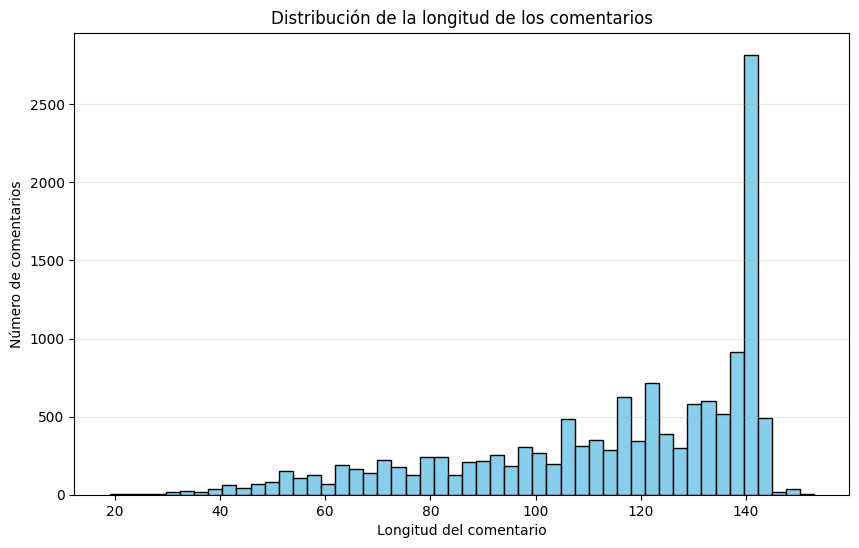

In [165]:
# Distru¿ibución de la longitud de los comentarios
data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(data['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Longitud del comentario')
plt.ylabel('Número de comentarios')
plt.title('Distribución de la longitud de los comentarios')
plt.grid(axis='y', alpha=0.3)
plt.show()

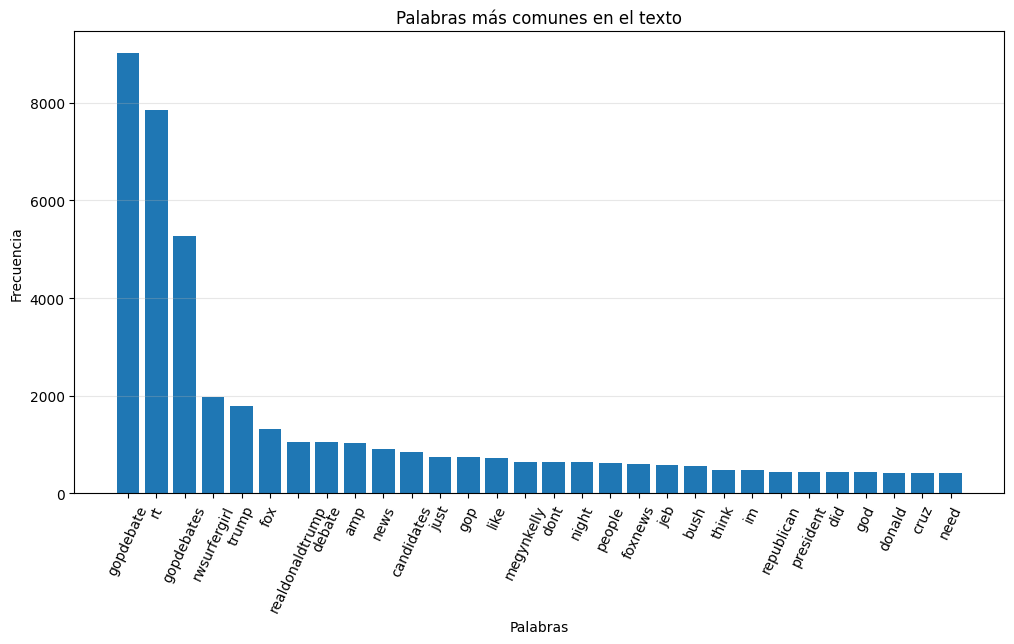

In [166]:
# Espacio para desarrollar el código necesario.

# Analisis de la frecuencia de palabras

# Limpiar el texto
data['text_clean'] = data['text'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Quitar palabras vacías (stop words)
vectorizer = TfidfVectorizer(stop_words='english')
stop_words = vectorizer.get_stop_words()

# Contar la frecuencia de las palabras
all_words = ' '.join(data['text_clean']).split()
all_words = [word for word in all_words if word not in stop_words]
word_freq = Counter(all_words)

# Histograma de las palabras más comunes
most_common_words = word_freq.most_common(30)
words, counts = zip(*most_common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=65)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Palabras más comunes en el texto')
plt.grid(axis='y', alpha=0.3)
plt.show()

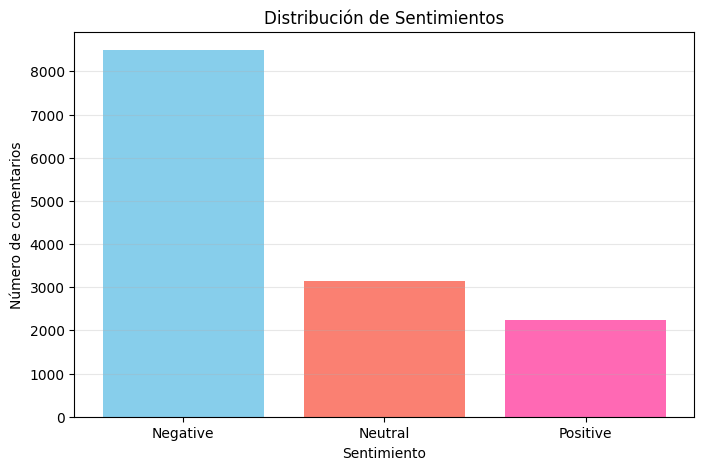

In [167]:
# Distribución de sentimientos
sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['skyblue', 'salmon', 'hotpink'])
plt.xlabel('Sentimiento')
plt.ylabel('Número de comentarios')
plt.title('Distribución de Sentimientos')
plt.grid(axis='y', alpha=0.3)
plt.show()

## Ejercicio 3: Análisis de sentimientos.
Usando algunas de las técnicas desarrolladas en clase, desarrolle una algoritmo que permita clasificar los comentarios como: positivos, negativos o neutros, en cada caso genere una nube de palabras.

Agregue comentarios o explicaciones breves en el códogo desarrollado.

In [192]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud

In [169]:
# Tokenizar el texto
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>') # Definir el tamaño del vocabulario
tokenizer.fit_on_texts(data['text_clean']) # Ajustar el tokenizador al texto limpio
sequences = tokenizer.texts_to_sequences(data['text_clean']) # Convertir el texto a secuencias de enteros

# Tamaño del vocabulario
print(f'Tamaño del vocabulario: {len(tokenizer.word_index)}')


# Definir el maximo número de secuencias
max_length = 100

# Rellenar las secuencias para que tengan la misma longitud
X_data = pad_sequences(sequences, maxlen=max_length, 
                                 padding='post', truncating='post')

# Mapear las etiquetas de sentimiento a valores numéricos
y_data = data['sentiment'].map({'Positive': 2, 'Neutral': 1, 'Negative': 0}).values

Tamaño del vocabulario: 19491


In [ ]:
# Definir el tamaño del vocabulario
vocab_size = len(tokenizer.word_index) + 1
# Dimensiones de embedding
embedding_dim = 16
# Número de LSTM units 
lstm_units = 32

# Construir el modelo (keras)
model_feelings = keras.Sequential([

    keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=128,
        input_length=max_length,
        name="embedding_layer"
    ),

    keras.layers.Bidirectional(
        keras.layers.LSTM(64, return_sequences=False, dropout=0.3)
    ),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(3, activation='softmax')   # 3 clases
])

# Construir el modelo (keras)
model_feelings.build(input_shape=(None, max_length))

# Resumen del modelo
model_feelings.summary()
# Numero total de parámetrod enterenables
total_params = model_feelings.count_params()
print(f'Número total de parámetros entrenables: {total_params}')

/home/alanp/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_layer (Embedding)     │ (None, 100, 128)       │     2,494,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,602,243 (9.93 MB)

 Trainable params: 2,602,243 (9.93 MB)

 Non-trainable params: 0 (0.00 B)

Número total de parámetros entrenables: 2602243


In [174]:
# Definir el optimizador
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Compilar el modelo
model_feelings.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

print("Modelo compilado correctamente.")

Modelo compilado correctamente.


In [175]:
# Entrenar el modelo
history_feelings = model_feelings.fit(
    X_data, y_data,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
)

Epoch 1/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 116s 317ms/step - accuracy: 0.6386 - loss: 0.8416 - val_accuracy: 0.6886 - val_loss: 0.7061
Epoch 2/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 99s 287ms/step - accuracy: 0.7290 - loss: 0.6637 - val_accuracy: 0.6969 - val_loss: 0.6762
Epoch 3/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 36s 103ms/step - accuracy: 0.7767 - loss: 0.5650 - val_accuracy: 0.7002 - val_loss: 0.7022
Epoch 4/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 54s 156ms/step - accuracy: 0.8027 - loss: 0.5014 - val_accuracy: 0.6829 - val_loss: 0.7462
Epoch 5/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 59s 171ms/step - accuracy: 0.8291 - loss: 0.4382 - val_accuracy: 0.7013 - val_loss: 0.8590
Epoch 6/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 65s 188ms/step - accuracy: 0.8509 - loss: 0.3772 - val_accuracy: 0.6977 - val_loss: 0.8696
Epoch 7/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 57s 165ms/step - accuracy: 0.8670 - loss: 0.3394 - val_accuracy: 0.6879 - val_loss: 0.9349
Epoch 8/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 58s 166ms/step - accuracy: 0.8828 - loss: 

In [176]:
# Metricas finales
final_accuracy = history_feelings.history['accuracy'][-1]
final_loss = history_feelings.history['loss'][-1]
final_val_accuracy = history_feelings.history['val_accuracy'][-1]
final_val_loss = history_feelings.history['val_loss'][-1]

print(f"Final training accuracy after 50 epochs: {final_accuracy*100:.2f}%")
print(f'Final loss: {final_loss:.4f}')
print(f"Final validation accuracy after 50 epochs: {final_val_accuracy*100:.2f}%")
print(f'Final validation loss: {final_val_loss:.4f}')

Final training accuracy after 50 epochs: 90.25%
Final loss: 0.2442
Final validation accuracy after 50 epochs: 67.86%
Final validation loss: 1.1007


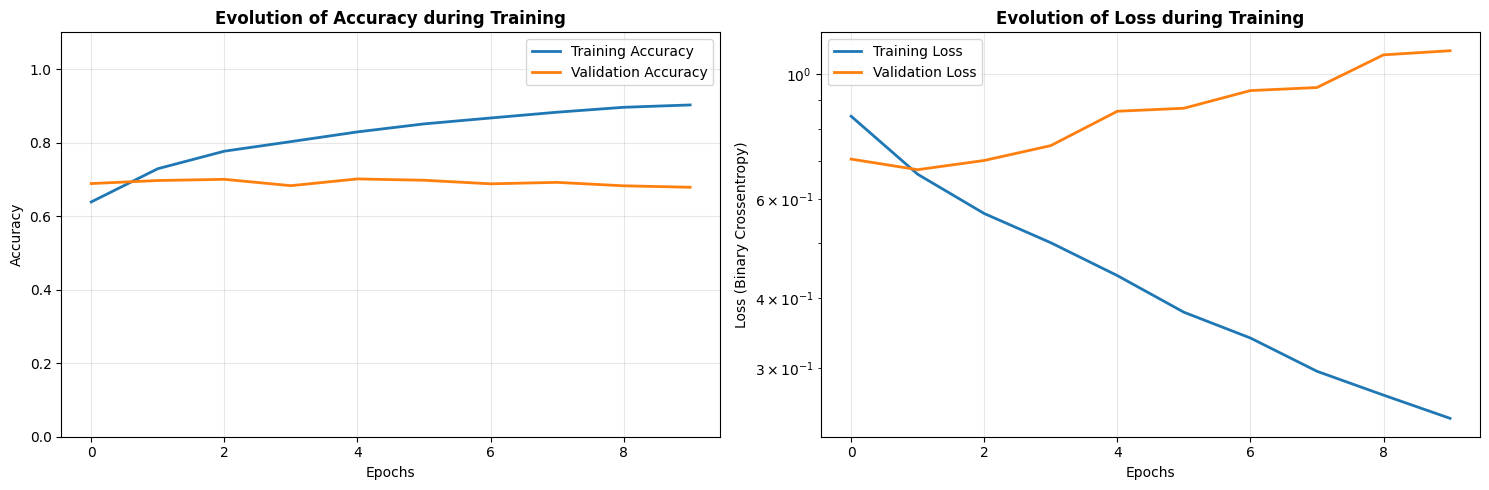

In [177]:
plt.figure(figsize=(15, 5))

# 1. CURVA DE ACCURACY
plt.subplot(1, 2, 1)
plt.plot(history_feelings.history['accuracy'], label='Training Accuracy', linewidth=2)
if 'val_accuracy' in history_feelings.history:
    plt.plot(history_feelings.history['val_accuracy'], label='Validation Accuracy', linewidth=2)

plt.title('Evolution of Accuracy during Training', fontweight='bold', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.1)

# 2. LOSS CURVE
plt.subplot(1, 2, 2)
plt.plot(history_feelings.history['loss'], label='Training Loss', linewidth=2)
if 'val_loss' in history_feelings.history:
    plt.plot(history_feelings.history['val_loss'], label='Validation Loss', linewidth=2)

plt.title('Evolution of Loss during Training', fontweight='bold', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show() 

Shape de embeddings: (19492, 128)


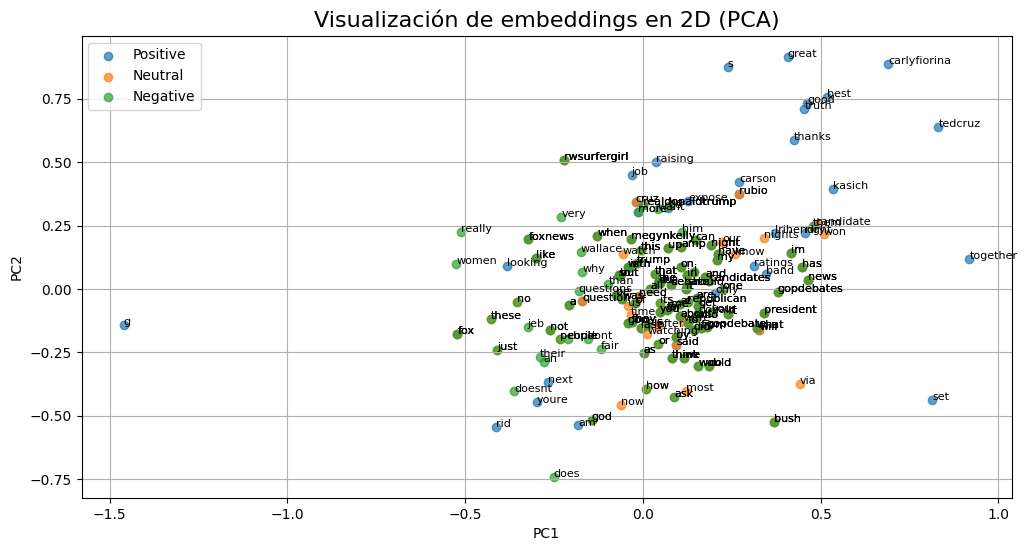

In [208]:
from sklearn.decomposition import PCA

# Obtener la capa de embeddings
embedding_layer = model_feelings.get_layer("embedding_layer")
embeddings = embedding_layer.get_weights()[0]  # matriz vocab_size x embedding_dim

print("Shape de embeddings:", embeddings.shape)

# PCA a 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)


# Obtener palabras por clase
def obtener_top_palabras_por_sentimiento(df, sentiment, tokenizer, n=100):
    textos = df[df["sentiment"] == sentiment]["text_clean"].tolist()
    
    counter = Counter(" ".join(textos).split())
    
    top_words = [w for w, _ in counter.most_common(n) if w in tokenizer.word_index]
    return top_words

top_pos = obtener_top_palabras_por_sentimiento(data, "Positive", tokenizer)
top_neu = obtener_top_palabras_por_sentimiento(data, "Neutral", tokenizer)
top_neg = obtener_top_palabras_por_sentimiento(data, "Negative", tokenizer)

# Mapear palabras a coordenadas PCA
def obtener_coords(words):
    coords = []
    labels = []
    for w in words:
        idx = tokenizer.word_index.get(w)
        if idx is not None and idx < embeddings_2d.shape[0]:
            coords.append(embeddings_2d[idx])
            labels.append(w)
    return np.array(coords), labels

coords_pos, labels_pos = obtener_coords(top_pos)
coords_neu, labels_neu = obtener_coords(top_neu)
coords_neg, labels_neg = obtener_coords(top_neg)


# Genera scatter plot con los embeddings
plt.figure(figsize=(12, 6))

plt.scatter(coords_pos[:,0], coords_pos[:,1], label="Positive", alpha=0.7)
plt.scatter(coords_neu[:,0], coords_neu[:,1], label="Neutral", alpha=0.7)
plt.scatter(coords_neg[:,0], coords_neg[:,1], label="Negative", alpha=0.7)

# Etiquetas
for coords, labels in [(coords_pos, labels_pos),
                       (coords_neu, labels_neu),
                       (coords_neg, labels_neg)]:
    for (x, y), word in zip(coords, labels):
        plt.text(x, y, word, fontsize=8)

plt.title("Visualización de embeddings en 2D (PCA)", fontsize=16)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc=2)
plt.grid(True)
plt.show()


## Ejercicio 4. Clasificadores de documentos.

1. Diseñe un algoritmo para clasificar documentos.
2. Agregue detalles sobre su funcionamiento.
3. Enumere las librerias que podria usar y explique el por qué de su elección.
4. En caso de usar un modelo basado en Inteligencia Artificial explique su funcinamiento.


In [ ]:
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Descargar stopwords en español
nltk.download('stopwords')
stopwords_es = set(stopwords.words("spanish"))


[nltk_data] Downloading package stopwords to /home/alanp/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def limpiar_texto(texto):
    """
    Función para limpiar el texto eliminando caracteres no deseados,
    convirtiendo a minúsculas, eliminando números, signos de puntuación,
    tildes y stopwords en español.
    Inputs:
        texto (str): El texto a limpiar.
    Returns:
        str: El texto limpio.
    """


    # Convertir a minúsculas
    texto = texto.lower()
    
    # Eliminar números
    texto = re.sub(r"\d+", "", texto)
    
    # Eliminar signos de puntuación
    texto = texto.translate(str.maketrans("", "", string.punctuation))
    
    # Eliminar tildes
    texto = texto.replace("á","a").replace("é","e").replace("í","i").replace("ó","o").replace("ú","u")
    
    # Eliminar stopwords
    palabras = texto.split()
    palabras = [p for p in palabras if p not in stopwords_es]
    
    # Unir de nuevo como texto limpio
    texto = " ".join(palabras)
    
    return texto

In [ ]:
# Espacio para desarrollar el código necesario.

# DataFrame para entrenamiento
data = {
    "text": [
        # ---------------- DEPORTES ----------------
        "El equipo ganó el partido con dos goles increíbles.",
        "El jugador anotó un gol en el último minuto.",
        "La selección nacional logró una victoria histórica.",
        "El entrenador presentó nuevas tácticas ofensivas.",
        "La final del torneo estuvo llena de emoción.",
        "El atleta rompió el récord en los 100 metros planos.",
        "El árbitro expulsó a dos jugadores por faltas fuertes.",
        "El estadio vibró con los cánticos de los aficionados.",
        "El delantero fue elegido como mejor jugador del mes.",
        "La liga anunció cambios importantes en el reglamento.",
        "El portero detuvo un penal decisivo.",
        "Los campeones celebraron con un desfile multitudinario.",
        "El partido amistoso terminó en un empate sin goles.",
        "El nuevo fichaje del equipo costó varios millones.",
        "El ciclista ganó la etapa más difícil de la competencia.",
        "Un error defensivo permitió el gol del rival.",
        "El boxeador ganó por nocaut técnico en el tercer asalto.",
        "La carrera de montaña registró una participación récord.",
        "El torneo juvenil mostró grandes talentos emergentes.",
        "La temporada comenzó con una sorprendente derrota del favorito.",

        # ---------------- CIENCIA ----------------
        "Un nuevo avance científico explica la energía oscura.",
        "Investigadores descubren un exoplaneta potencialmente habitable.",
        "Gran hallazgo en física cuántica confirma predicciones teóricas.",
        "Un estudio analiza la evolución de galaxias jóvenes.",
        "Nueva tecnología permite observar agujeros negros con mayor precisión.",
        "La inteligencia artificial acelera la investigación médica.",
        "Astrofísicos detectan señales inusuales provenientes de una estrella.",
        "Científicos crean material ultraligero con propiedades sorprendentes.",
        "Un robot autónomo explora las profundidades del océano.",
        "Se publica un modelo que explica el origen del universo temprano.",
        "El CERN anuncia mejoras en el acelerador de partículas.",
        "Biólogos estudian los patrones de crecimiento celular.",
        "La NASA confirma actividad geológica en una luna de Júpiter.",
        "Se desarrolla una vacuna basada en nanotecnología.",
        "Descubren un mineral desconocido en un meteorito.",
        "Un experimento demuestra entrelazamiento cuántico a gran distancia.",
        "Nuevas simulaciones revelan la dinámica del plasma solar.",
        "Investigadores logran observar el interior de un átomo.",
        "Un estudio analiza la expansión acelerada del universo.",
        "La computación cuántica avanza hacia procesadores más estables.",

        # ---------------- COCINA ----------------
        "La receta incluye queso, tomate y masa delgada.",
        "Este platillo combina sabores dulces y picantes.",
        "La pasta se cocina en agua hirviendo durante diez minutos.",
        "El chef recomendó usar ingredientes frescos para mejor sabor.",
        "La sopa necesita sal, cebolla, apio y un toque de pimienta.",
        "El postre está hecho con chocolate amargo y crema.",
        "La receta tradicional usa pollo, arroz y especias.",
        "Para la salsa se mezcla tomate, ajo y orégano.",
        "Esta galletas llevan mantequilla, azúcar y harina.",
        "El pan se hornea a 180 grados por treinta minutos.",
        "Un guiso casero preparado con verduras de temporada.",
        "La ensalada combina lechuga, manzana y nueces.",
        "El arroz debe lavarse antes de cocinarse.",
        "El adobo se prepara con limón y hierbas aromáticas.",
        "Un batido de fresa con yogurt natural.",
        "Las empanadas se fríen hasta que estén doradas.",
        "La pizza casera requiere harina, levadura y aceite.",
        "Para marinar la carne se usa salsa de soja y jengibre.",
        "Las verduras se saltean en una sartén caliente.",
        "Este platillo vegano utiliza tofu y salsa de sésamo."
    ],
    "label": [
        # deportes (20)
        *["deportes"] * 20,
        # ciencia (20)
        *["ciencia"] * 20,
        # cocina (20)
        *["cocina"] * 20
    ]
}


# Crear DataFrame
df = pd.DataFrame(data)
texts = df["text"].values
labels = df["label"].values

# Limpiar los textos
df["text_clean"] = df["text"].apply(limpiar_texto)

texts = df["text_clean"].values
labels = df["label"].values

In [ ]:
# Codificacion de etiquetas 
encoder = LabelEncoder()
y = encoder.fit_transform(labels) # Transformar etiquetas a números
Y_data = to_categorical(y)  # Convertir a codificación one-hot (para clasificación multiclase)

num_classes = Y_data.shape[1]  # Número de clases


print('Número de clases:', num_classes)
print('Clases:')
for i, class_label in enumerate(encoder.classes_):
    print(f"{i}: {class_label}")

Número de clases: 3
Clases:
0: ciencia
1: cocina
2: deportes


In [ ]:
# Toquenización de texto
VOCAB_SIZE = len(tokenizer.word_index) + 1
tokenizer = Tokenizer(num_words=VOCAB_SIZE,
                        oov_token='OOV')
tokenizer.fit_on_texts(texts)

# Create sequences of tokens
sequences = tokenizer.texts_to_sequences(texts)

# Longitud máxima de las secuencias
max_length = max(len(seq) for seq in sequences)

# Pad sequences para asegurar que todas tengan la misma longitud
X_data = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
# Construir el modelo (keras)
embedding_dim = 64
lstm_units = 64

model = keras.Sequential([
    keras.layers.Embedding(
        input_dim=vocab_size, 
        output_dim=embedding_dim),

    keras.layers.LSTM(
        units=lstm_units),

    keras.layers.Dense(
        units=64, 
        activation="relu"),
    keras.layers.Dense(
        units=num_classes, 
        activation="softmax")
])

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.build(input_shape=(None, max_length))

# Resumen del modelo
print("Resumen del modelo:")
model.summary()
total_params = model.count_params()
print(f'Número total de parámetros entrenables: {total_params}')


Resumen del modelo:


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)        │ (None, 8, 64)          │     1,247,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,284,867 (4.90 MB)

 Trainable params: 1,284,867 (4.90 MB)

 Non-trainable params: 0 (0.00 B)

Número total de parámetros entrenables: 1284867


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Modelo compilado correctamente.")

Modelo compilado correctamente.


In [ ]:
print(X_data.shape)
print(Y_data.shape)

(60, 8)
(60, 3)


In [ ]:
history = model.fit(
    X_data, Y_data,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.7917 - loss: 0.4485 - val_accuracy: 0.0000e+00 - val_loss: 1.5730
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7708 - loss: 0.4725 - val_accuracy: 0.0000e+00 - val_loss: 3.0499
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7708 - loss: 0.4289 - val_accuracy: 0.0000e+00 - val_loss: 1.9789
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8125 - loss: 0.4074 - val_accuracy: 0.0000e+00 - val_loss: 1.7751
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7708 - loss: 0.3931 - val_accuracy: 0.0000e+00 - val_loss: 2.7287
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8125 - loss: 0.3896 - val_accuracy: 0.0000e+00 - val_loss: 2.6739
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.8333 - loss: 0.3381 - val_accuracy: 0.0000e+00 - val_loss: 1.9948
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8125 - loss: 0.3500 - val_accurac

In [ ]:
# Show final metrics
final_accuracy = history.history['accuracy'][-1]
final_loss = history.history['loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final training accuracy after 50 epochs: {final_accuracy*100:.2f}%")
print(f'Final loss: {final_loss:.4f}')
print(f"Final validation accuracy after 50 epochs: {final_val_accuracy*100:.2f}%")
print(f'Final validation loss: {final_val_loss:.4f}')

Final training accuracy after 50 epochs: 95.83%
Final loss: 0.1127
Final validation accuracy after 50 epochs: 33.33%
Final validation loss: 2.2951


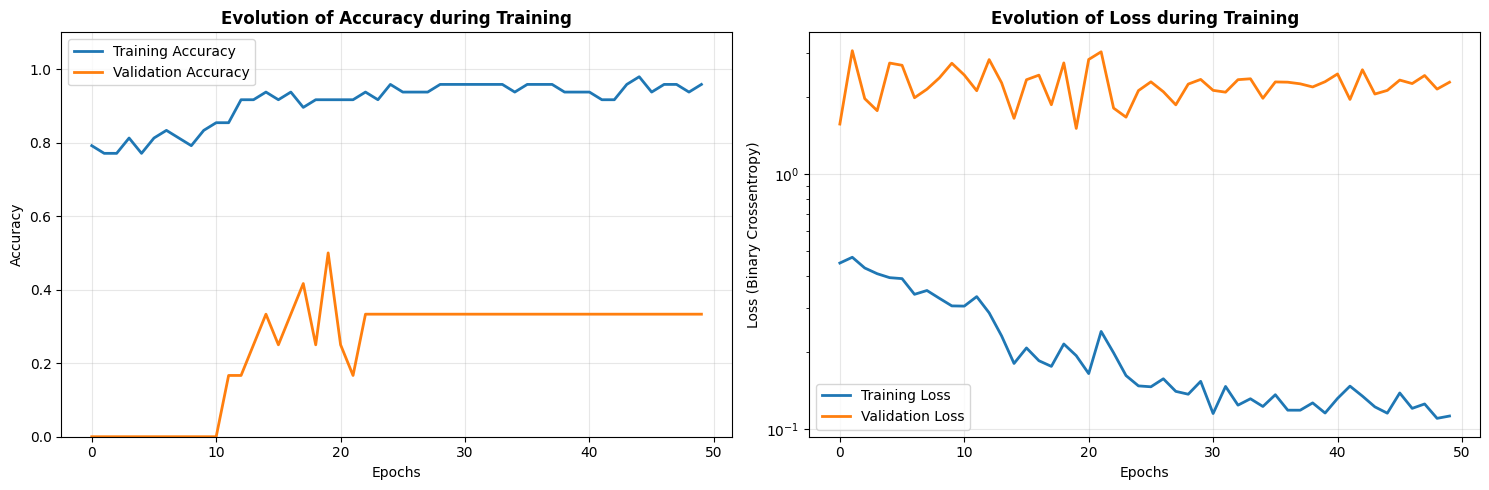

In [ ]:
plt.figure(figsize=(15, 5))

# 1. CURVA DE ACCURACY
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)

plt.title('Evolution of Accuracy during Training', fontweight='bold', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.1)

# 2. LOSS CURVE
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)

plt.title('Evolution of Loss during Training', fontweight='bold', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show() 

In [ ]:
def clasificar_documento(texto):
    texto_limpio = limpiar_texto(texto)
    seq = tokenizer.texts_to_sequences([texto_limpio])
    seq = pad_sequences(seq, maxlen=max_length, padding="post")
    pred = model.predict(seq)[0]
    clase = encoder.inverse_transform([np.argmax(pred)])[0]
    return clase

In [ ]:
# Textos de prueba
textos_prueba = [
    "El partido fue emocionante y el equipo local ganó con un gol en el último minuto.",
    "La receta de la paella tradicional incluye arroz, mariscos y azafrán."
]

for texto in textos_prueba:
    clase_predicha = clasificar_documento(texto)
    print(f'Texto: "{texto}"\nClase predicha: {clase_predicha}\n')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Texto: "El partido fue emocionante y el equipo local ganó con un gol en el último minuto."
Clase predicha: deportes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Texto: "La receta de la paella tradicional incluye arroz, mariscos y azafrán."
Clase predicha: cocina

